1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞/Î≥ÄÌôò
2. TextÏûêÎ£å Í∞ÄÍ≥µ
  1. Î∂ÄÏ†ïÎ¶¨Î∑∞ Ï∂îÏù¥
  2. Wordcloud
  3. Ï£ºÏöîÎã®Ïñ¥(top 30)
  4. Ïó∞Í¥ÄÎã®Ïñ¥(keyword Í∏∞Ï§Ä)
  5. ÌäπÏù¥Î¶¨Î∑∞(ÏöîÏ≤≠Ìïú ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú ÎÇ¥Ïö©)
3. Ïù¥Î©îÏùº ÏñëÏãù ÏûëÏÑ±

In [1]:
# DBÏ†ëÏÜç
import pymysql
import pandas as pd
import numpy as np
import os

# from konlpy.tag import Okt
# okt = Okt("C:/Program Files/Java/jdk-12.0.1/bin/server/jvm.dll")

# ÌïúÍ∏ÄÏ†ïÏ†ú KoNLPy
from ckonlpy.tag import Twitter
twitter = Twitter()

# Í∑∏ÎûòÌîÑ
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/windows/Fonts/malgun.ttf'                           # Ìè∞Ìä∏:ÎßëÏùÄÍ≥†Îîï
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)

# Î∂ÑÏÑù1 : Trend ÌÉêÏãù Ïãú, Ïù¥ÏÉÅÏπò ÌôïÏù∏
from sklearn.neighbors import LocalOutlierFactor

# Î∂ÑÏÑù2 : wordcloud Ï§ÄÎπÑ
from wordcloud import WordCloud

# Î∂ÑÏÑù3 : text rank ÎèÑÏ∂ú
import itertools
import nltk

# ÏãúÍ∞ÑÍ∏∞Î°ù
from datetime import datetime, timedelta
import time 

# ÎÇ¥Ïö©Í≥µÏú†(e-mail, ÌöåÏÇ¨) 
# import send_email as se
from jinja2 import Template

import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [655]:
# Ï†úÌíàÍµ∞ Ï†ïÎ≥¥
category_group = 'HMR'
category_en = 'HMR'
category = [['Ïä§ÌîÑ',  'ÎπÑÎ¶¨Îã§'],
            ['Ïπ¥Î†à',  'ÎÉÑÏÉà'  ],
            ['ÌååÏä§ÌÉÄ',  'ÎßõÏóÜÎã§'],
            ['Í∂Å',  'ÎÖπÎã§'  ],
            ['ÏÑºÏÑúÌã∞Î∏å', 'Îã¨Îã§'  ],
            ['ÏÑºÏÑúÌã∞Î∏å', 'ÌååÏÜê'  ] ]


### I.Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [656]:
# Ï†úÌíàÍµ∞ Ï†ïÎ≥¥
df_product = pd.read_excel('./PRODUCT.xlsx','Sheet1')
df_product['PRODUCT_CODE'] = df_product['PRODUCT_CODE'].astype(object)
df_product = df_product[df_product['category1'] == category_group ]

In [657]:
query_values = tuple(df_product.PRODUCT_CODE.to_list())
query_values = str(query_values)

In [658]:
#########
# rawdata Î∂àÎü¨Ïò§Í∏∞
###

# DBÏó∞Í≤∞
conn = pymysql.connect(host = '**.***.*.*', user ='__USER_ID__', password = "__PASSWORD__", database='__DATABASE__')

# cursor ÏÑ§Ï†ï
cursor = conn.cursor(pymysql.cursors.DictCursor)


In [659]:
# ÏøºÎ¶¨Ïã§Ìñâ: Ï†ÑÏ≤¥Î¶¨Î∑∞
sql= '''select PRODUCT_CODE
        , (SELECT code_nm FROM JT_CODE B WHERE A.PRODUCT_CODE = B.CODE AND B.CODE_GRP_ID = 'PRODUCT')"ÏÉÅÌíàÎ™Ö"
        , A.GRADE as "Íµ¨Îß§ÏûêÌèâÏ†ê" 
        , A.CONTENTS as Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©
        , (STR_TO_DATE(A.WRITE_DT, '%Y%m%d'))  as Î¶¨Î∑∞Îì±Î°ùÏùº 
        , (SELECT CODE_NM FROM JT_CODE B WHERE A.COMPANY_CODE = B.CODE AND B.CODE_GRP_ID = 'DEALER_ID') as ÏàòÏßëÏ±ÑÎÑê 
        FROM MAEIL_REVIEW A
        where GRADE in (1,2,3,4,5)
        and PRODUCT_CODE in ''' + query_values + ''' and DATE_FORMAT(substr(A.WRITE_DT, 1,8), '%Y/%m/%d') between DATE_ADD(curdate(),INTERVAL - 14 DAY) and DATE_ADD(curdate(),INTERVAL -1 DAY)
        group by A.COMPANY_CODE, A.WRITER, A.CONTENTS, A.WRITE_DT, A.GRADE, A.PRODUCT_CODE
        order by A.WRITE_DT
        '''
cursor.execute(sql)
df_review_all = cursor.fetchall()
df_review_all = pd.DataFrame(df_review_all)
df_review_all['Î¶¨Î∑∞Îì±Î°ùÏùº'] = pd.to_datetime(df_review_all['Î¶¨Î∑∞Îì±Î°ùÏùº'])
df_review_all = df_review_all.join(df_product.set_index('ÏÉÅÌíàÎ™Ö')['category2'], on='ÏÉÅÌíàÎ™Ö')

df_review_all = df_review_all[df_review_all.columns[2:]].drop_duplicates().reset_index(drop=True)

In [660]:
# pd.DataFrame(df_review_all.groupby(['category2', 'ÏàòÏßëÏ±ÑÎÑê'])['Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©'].count())

In [661]:
df_review_all = df_review_all.replace('25 Ïπ¥Ïπ¥Ïò§ ÌÜ°Ïä§ÌÜ†Ïñ¥(20.12.2~ÎØ∏ÏÇ¨Ïö©)', '25 Ïπ¥Ïπ¥Ïò§ÌÜ°')

In [662]:
###############
# Text Ï†ïÏ†ú
#####

# ÏÇ¨Ï†ÑÏóê Í≥†Ïú† Î™ÖÏÇ¨ Ï∂îÍ∞Ä
twitter.add_dictionary('ÏÖÄÎ†âÏä§', 'Noun')
twitter.add_dictionary('Î¨¥ÏÑ§ÌÉï', 'Noun')
twitter.add_dictionary('ÌîÑÎ°úÌã¥', 'Noun')
twitter.add_dictionary('Î≥¥ÎÉâÎ∞±', 'Noun')
twitter.add_dictionary('ÎùºÎ∞©', 'Noun')
twitter.add_dictionary('Ïû¨Íµ¨Îß§', 'Noun')
twitter.add_dictionary('Ïú†ÌÜµÍ∏∞Ìïú', 'Noun')
twitter.add_dictionary('ÏÇ¨ÏùÄÌíà', 'Noun')
twitter.add_dictionary('ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à', 'Noun')
twitter.add_dictionary('Ìå•ÎπôÏàò', 'Noun')

def tokenize(doc):
    result = ['/'.join(t) for t in twitter.pos(doc, norm=True, stem=True)] # ex 'ÎçîÎπô/Norm', 'ÎÇòÎã§/Verb'
    return result 

def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += " " + ele.strip()  
    return str1


In [663]:
#ÌÜ†ÌÅ∞Ìôî : Ï†ÑÏ≤¥Î¶¨Î∑∞ÏûêÎ£å
df_temp1 = df_review_all['Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©'].replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")

# regex to konlpy
token_all = [tokenize(row) for row in df_temp1 ]  

data_trim2 = []
for i in range(len(df_temp1)):
    t = ' '.join(token_all[i])
    data_trim2.append(t.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]",""))
    
df_temp1 = pd.DataFrame(data_trim2)
df_temp1 = df_temp1[0].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")

df_review_all['token'] = df_temp1
df_review_all['token_attribution'] = token_all


In [664]:
# Î∂ÄÏ†ï Î¶¨Î∑∞
df_review_neg= df_review_all[(df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê']=='1')|(df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê']=='2')]

# Í∏çÏ†ï Î¶¨Î∑∞
df_review_pos= df_review_all[(df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê']=='4')|(df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê']=='5')]

# Ï§ëÎ¶Ω Î¶¨Î∑∞
df_review_nue= df_review_all[(df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê']=='3')]


In [665]:
# Ï§ëÍ∞ÑÌôïÏù∏
# df_temp.drop_duplicates()
# df_temp[104]
# data_trim2[104]

### III.Îç∞Ïù¥ÌÑ∞ Î¶¨Ìè¨ÌåÖ

In [666]:
# df_product[df_product['category1'] =='ÏÖÄÎ†âÏä§']

#### 1.Ï†úÌíà ÌòÑÌô©

In [667]:
###############
# Î¶¨Ìè¨Ìä∏Ïö© ÏûêÎ£å ÎßåÎì§Í∏∞ : 1.Ï†úÌíà ÌòÑÌô©
#####

# ÏûêÎ£å Ï†ïÎ†¨
df_temp1 = pd.DataFrame(df_review_pos.groupby(['category2'])['Î¶¨Î∑∞Îì±Î°ùÏùº'].count())
df_temp1.rename(columns = { 'Î¶¨Î∑∞Îì±Î°ùÏùº' : 'Í∏çÏ†ïÎ¶¨Î∑∞(4~5)' }, inplace = True)

df_temp2 = pd.DataFrame(df_review_nue.groupby(['category2'])['Î¶¨Î∑∞Îì±Î°ùÏùº'].count())
df_temp2.rename(columns = { 'Î¶¨Î∑∞Îì±Î°ùÏùº' : 'Ï§ëÎ¶ΩÎ¶¨Î∑∞(3)' }, inplace = True)

df_temp3 = pd.DataFrame(df_review_neg.groupby(['category2'])['Î¶¨Î∑∞Îì±Î°ùÏùº'].count())
df_temp3.rename(columns = { 'Î¶¨Î∑∞Îì±Î°ùÏùº' : 'Î∂ÄÏ†ïÎ¶¨Î∑∞(1~2)' }, inplace = True)

# ÏûêÎ£å Ìï©ÏπòÍ∏∞
report_01 = df_temp1.merge(df_temp2, how='left', on=['category2']).fillna(0)
report_01 = report_01.merge(df_temp3, how='left', on=['category2']).fillna(0)

report_01.loc['Ìï©Í≥Ñ']=[report_01[report_01.columns[0]].sum(),
                   report_01[report_01.columns[1]].sum(),
                   report_01[report_01.columns[2]].sum() ]

pd.options.display.float_format = '{:0,.0f}'.format



In [668]:
report_01

Í∏çÏ†ïÎ¶¨Î∑∞(4~5)  Ï§ëÎ¶ΩÎ¶¨Î∑∞(3)  Î∂ÄÏ†ïÎ¶¨Î∑∞(1~2)
category2                               
Î∏åÎ¶¨Îòê               66        4          3
Ïä§ÌîÑ               143        4          1
Ïπ¥Î†à                81        2          0
ÌååÏä§ÌÉÄ               46        2          0
Ìï©Í≥Ñ               336       12          4

#### 1.Î∂ÄÏ†ïÎ¶¨Î∑∞ Ï∂îÏù¥ + word cloud

In [669]:
###############
# Î¶¨Ìè¨Ìä∏Ïö© ÏûêÎ£å ÎßåÎì§Í∏∞ : 2.Trend &  Wordcloud
#####

# word cloud ÏÉùÏÑ±
def wordcloud_gen(dataset):
    text = dataset.to_list()
    text_all = listToString(text)
    wc1 = WordCloud(font_path= path, stopwords = stopword, width = 900, height = 600, background_color="white", repeat=True)
    return wc1.generate(text_all)

In [670]:
stopword = ['Î®πÎã§', 'ÌïòÎã§', 'Ï¢ãÎã§'  , 'ÏòàÏöî', 'Ïù¥ÏóêÏöî', 'ÏûàÎã§', 'ÎßõÏûàÎã§', 'Í∞ôÎã§', 'ÏóÜÎã§', 'Î≥¥ÌÜµ', 'ÏµúÍ≥†', 'Ï£ºÎ¨∏', 'Î≥¥Îã§', 'Îß§Ïùº',
         'Íµ¨Îß§', 'ÏóêÏÑú', 'Î®πÏù¥Îã§', 'ÏïäÎã§', 'ÏûêÎã§'  , 'Îì§Îã§', 'ÏÇ¨Îã§'  , 'ÎêòÎã§', 'ÏúºÎ°ú', '„Ö†„Ö†', '„Öú„Öú', 'ÎßêÎã§', 'Ïù¥Îã§', 'Î∞õÎã§',
         'ÏïÑÏßÅ', 'Ïù¥Îã§', 'Î≥¥Ïù¥Îã§', 'Ïù¥ÎÇò', 'Ïò§Îã§'  , 'Ïù¥Îùº', 'Ïö∞Ïú†'  , 'Î∞∞Îã¨', 'Î∞∞ÏÜ°', 'Í∞ÄÏ†ï', 'Ï†úÌíà', 'Ïã†Ï≤≠', 'Î¨∏Ïùò', 'ÎêòÏñ¥Îã§',
         'ÎÑòÎã§', '„Öã„Öã', '„Öã„Öã„Öã', '„Öé„Öé', 'ÏßÑÏßú'  , 'ÎÑàÎ¨¥', 'Ïù¥', 'Îäî', 'Ïöî', 'ÏùÄ', 'Ïóê', 'Í∏∞', 'Îã§', 'ÎèÑ', 'Ïõê', 'Íµ¨', 'Í∞ú', 'Îûë','Í∞Ä',
         'ÎèÑ', 'ÏûÑÏãú', 'Ïù¥ÎØ∏ÏßÄ', 'ÌôïÏù∏', 'ÌõÑ', 'ÏùÑ', 'Ïïà' ,'ÎêòÎã§', 'Ìïò', 'Ïã¨', 'Í≥†Í∞ù', 'Îãò', 'Ïñ¥Ïöî', 'Ï¢Ä', 'Í≤É', 'Îãà', 'Ïñ¥Î≥¥', 'ÌÉÄ',
         'ÏÉùÍ∞Å', 'ÏßÄÎßå', 'Ïûò', 'Ï†ú', 'ÎãàÎã§', 'ÎÑ§', 'Ìï¥', 'Í∑∏ÎûòÎèÑ', 'ÏóÑÏ≤≠', 'ÌïòÍ≥†', 'Î≤à', 'Í∑∏', 'ÎÇòÎã§', 'Ïãú', 'Îã§Í∞Ä', 'Ìïú', 'Ìï¥ÏÑú', 'Î°ú',
         'Îçî', 'Î™ª', 'ÏóêÎäî', 'ÎçòÎç∞', 'ÏùºÎã®', 'ÎÇòÏöî', 'ÏïÑÌïò', 'Ïù¥Ï†Å','Ïù¥Í≥†', 'Î†§Í≥†', 'Ïù¥ÎùºÍ≥†', 'Í≥†', 'Ïñ¥ÏÑú','Î•º', 'Í∑∏ÎÉ•', 'Îßå', 'ÏßßÎã§',
         'Ïú†ÌÜµÍ∏∞Ìïú', 'Ïù∏Îç∞', 'Î∞ïÏä§', 'ÍπåÏßÄ', 'Ïùº', 'Ïõî', 'Îëê', 'Ìå©','Ïñ¥Ïöî', 'Ïöî','Îã§', 'Ìïú', 'ÏûàÎã§', 'Îùº', 'ÎÇò', 'Í≤å', 'Í±∞', 'Îç∞',
         'ÎçîÎãà','Îã¨', 'Î≥¥', 'Ïù¥Î≤à', 'Ïù¥ÎÑ§', 'ÎÇ¥Ï£º', 'ÌïòÎÇò', 'Ïàò', 'Ï†Ä', 'Ïù¥Î†áÎã§', 'Ïù¥Î†áÍ≤å', '„Ö†', 'Îïå', 'Îäò', 'Îòê', 'Ìé∏', 'Îäò','Í∞êÏÇ¨',
         'Ìï≠ÏÉÅ', 'Ïó¨', 'ÏïÑÌï¥', 'Îì§', 'Ï§ë', 'Ïó¥', 'ÏòÅ', 'Î∂Ñ', 'ÏÑ∏', 'Î≠ê', 'Î£®', 'Ïïå', 'Ïö©', 'ÌÜµ', 'Ìï®', 'Î¨¥', 'ÏÉù', 'Î¨º', 'Î¶¨', 'ÏÉà',
         'Ï†Å', 'hellip'
         ]


In [671]:
# Trend ÏûêÎ£å ÏÉùÏÑ±
trend_review_all = pd.pivot_table(df_review_all, index = 'Î¶¨Î∑∞Îì±Î°ùÏùº', values = 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©', columns = 'Íµ¨Îß§ÏûêÌèâÏ†ê', aggfunc = 'count').fillna(0)


In [672]:
trend_review_pos = pd.pivot_table(df_review_pos, index = 'Î¶¨Î∑∞Îì±Î°ùÏùº', values = 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©', aggfunc = 'count').fillna(0)
trend_review_nue = pd.pivot_table(df_review_nue, index = 'Î¶¨Î∑∞Îì±Î°ùÏùº', values = 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©', aggfunc = 'count').fillna(0)
trend_review_neg = pd.pivot_table(df_review_neg, index = 'Î¶¨Î∑∞Îì±Î°ùÏùº', values = 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©', aggfunc = 'count').fillna(0)

In [673]:
channel_review_pos = pd.pivot_table(df_review_pos, index = 'ÏàòÏßëÏ±ÑÎÑê', values = 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©', aggfunc = 'count').fillna(0)
channel_review_pos.rename(columns = { 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©' : 'Í∏çÏ†ïÎ¶¨Î∑∞(4~5)' }, inplace = True)

channel_review_nue = pd.pivot_table(df_review_nue, index = 'ÏàòÏßëÏ±ÑÎÑê', values = 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©', aggfunc = 'count').fillna(0)
channel_review_nue.rename(columns = { 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©' : 'Ï§ëÎ¶ΩÎ¶¨Î∑∞(3)' }, inplace = True)

channel_review_neg = pd.pivot_table(df_review_neg, index = 'ÏàòÏßëÏ±ÑÎÑê', values = 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©', aggfunc = 'count').fillna(0)
channel_review_neg.rename(columns = { 'Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©' : 'Î∂ÄÏ†ïÎ¶¨Î∑∞(1~2)' }, inplace = True)

report_02 = channel_review_pos.merge(channel_review_nue, how='left', on=['ÏàòÏßëÏ±ÑÎÑê']).fillna(0)
report_02 = report_02.merge(channel_review_neg, how='left', on=['ÏàòÏßëÏ±ÑÎÑê']).fillna(0)


In [674]:
report_02

Í∏çÏ†ïÎ¶¨Î∑∞(4~5)  Ï§ëÎ¶ΩÎ¶¨Î∑∞(3)  Î∂ÄÏ†ïÎ¶¨Î∑∞(1~2)
ÏàòÏßëÏ±ÑÎÑê                                  
1 Ïø†Ìå°             2        0          0
2 11Î≤àÍ∞Ä          45        3          0
3 ÎÑ§Ïù¥Î≤Ñ          287        9          4
4 SSGÎã∑Ïª¥          2        0          0

In [675]:
def average_line(dataset):
    x = dataset.index
    y = dataset['Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©']
    y_mean = [np.mean(y)]*len(x)

    # Plot the data
    plt.plot(x,y, label='Î¶¨Î∑∞Ïàò', marker='o')

    # Plot the average line
    plt.plot(x,y_mean, label='Î¶¨Î∑∞Ïàò(Avg.)', linestyle='--')

    # Make a legend
    plt.legend(loc='upper right', fancybox=True, shadow=True)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.5)
    plt.xticks(rotation=45)
    

In [676]:
import matplotlib.image as mpimg

#### 3.Ï£ºÏöîÎã®Ïñ¥(top 30) 

Ïù¥ÏäàÏÇ¨Ìï≠
  + [ ] filtering ÏÑ§Ï†ï

In [680]:
###############
# Î¶¨Ìè¨Ìä∏Ïö© ÏûêÎ£å ÎßåÎì§Í∏∞ : 3. Ï£ºÏöîÎã®Ïñ¥ Rank
#####

# ÎÇ†Ïßú ÏßÄÏ†ï
termA_start = (df_review_all.Î¶¨Î∑∞Îì±Î°ùÏùº.max() - timedelta(days=7)).strftime('%Y-%m-%d')
termA_end   = (df_review_all.Î¶¨Î∑∞Îì±Î°ùÏùº.max()).strftime('%Y-%m-%d')
termB_start = (df_review_all.Î¶¨Î∑∞Îì±Î°ùÏùº.min()).strftime('%Y-%m-%d')
termB_end   = (df_review_all.Î¶¨Î∑∞Îì±Î°ùÏùº.min()+  timedelta(days=7)).strftime('%Y-%m-%d')


# ÏûêÎ£åÍ∞ÄÍ≥µ
df_review_pos_termA = df_review_pos[df_review_pos.Î¶¨Î∑∞Îì±Î°ùÏùº.between(termA_start, termA_end)]
df_review_pos_termB = df_review_pos[df_review_pos.Î¶¨Î∑∞Îì±Î°ùÏùº.between(termB_start, termB_end)]

df_review_nue_termA = df_review_nue[df_review_nue.Î¶¨Î∑∞Îì±Î°ùÏùº.between(termA_start, termA_end)]
df_review_nue_termB = df_review_nue[df_review_nue.Î¶¨Î∑∞Îì±Î°ùÏùº.between(termB_start, termB_end)]

df_review_neg_termA = df_review_neg[df_review_neg.Î¶¨Î∑∞Îì±Î°ùÏùº.between(termA_start, termA_end)]
df_review_neg_termB = df_review_neg[df_review_neg.Î¶¨Î∑∞Îì±Î°ùÏùº.between(termB_start, termB_end)]


list_pos_termA = list(itertools.chain(*df_review_pos_termA.token_attribution))
list_pos_termB = list(itertools.chain(*df_review_pos_termB.token_attribution))

list_nue_termA = list(itertools.chain(*df_review_nue_termA.token_attribution))
list_nue_termB = list(itertools.chain(*df_review_nue_termB.token_attribution))

list_neg_termA = list(itertools.chain(*df_review_neg_termA.token_attribution))
list_neg_termB = list(itertools.chain(*df_review_neg_termB.token_attribution))


def wordrank(dataset):
    ko = nltk.Text(dataset)
    
    data = ko.vocab().items()
    reviw_word_all = pd.DataFrame.from_dict(data)
    reviw_word_all.rename(columns = { 1 : 'count' }, inplace = True)
    reviw_word_all = reviw_word_all.sort_values('count', ascending=False)
    reviw_word_all['ÏÜçÏÑ±'] =reviw_word_all[0].str.split('/').str[1]
    reviw_word_all['ÎÇ¥Ïö©'] =reviw_word_all[0].str.split('/').str[0]

    # stopword ÎÇ¥Ïö© ÏÇ≠Ï†ú
    reviw_word_all = reviw_word_all[~reviw_word_all.ÎÇ¥Ïö©.isin(stopword)]

    # ÏùºÎ∂Ä ÏÜçÏÑ± ÏÇ≠Ï†ú
    reviw_word_all = reviw_word_all[(reviw_word_all['ÏÜçÏÑ±']!=  'Punctuation')]
    reviw_word_all = reviw_word_all[(reviw_word_all['ÏÜçÏÑ±']!=  'Josa')]
    reviw_word_all = reviw_word_all[(reviw_word_all['ÏÜçÏÑ±']!=  'Foreign')]
    reviw_word_all = reviw_word_all[(reviw_word_all['ÏÜçÏÑ±']!=  'KoreanParticle')]
    reviw_word_all = reviw_word_all[(reviw_word_all['ÏÜçÏÑ±']!=  'Number')]
    reviw_word_all = reviw_word_all[(reviw_word_all['ÏÜçÏÑ±']!=  'Adverb')]
    reviw_word_all = reviw_word_all[(reviw_word_all['ÏÜçÏÑ±']!=  'Exclamation')]

    # top15 Îßå ÏßÄÏ†ï
    reviw_word_all = reviw_word_all[['ÏÜçÏÑ±', 'ÎÇ¥Ïö©', 'count']]

    return reviw_word_all


In [681]:
wordrank_pos_termA = wordrank(list_pos_termA)
wordrank_pos_termA['Í∏∞Í∞ÑÍµ¨Î∂Ñ'] = '1Ï£ºÏ†Ñ(A)'
wordrank_pos_termA['Î¶¨Î∑∞ÏãúÏ†ê'] = termA_end
wordrank_pos_termA['RANK'] = wordrank_pos_termA['count'].rank(ascending = False)

wordrank_pos_termB = wordrank(list_pos_termB)
wordrank_pos_termB['Í∏∞Í∞ÑÍµ¨Î∂Ñ'] = '2Ï£ºÏ†Ñ(B)'
wordrank_pos_termB['Î¶¨Î∑∞ÏãúÏ†ê'] = termB_end
wordrank_pos_termB['RANK'] = wordrank_pos_termB['count'].rank(ascending = False)

wordrank_nue_termA = wordrank(list_nue_termA)
wordrank_nue_termA['Í∏∞Í∞ÑÍµ¨Î∂Ñ'] = '1Ï£ºÏ†Ñ(A)'
wordrank_nue_termA['Î¶¨Î∑∞ÏãúÏ†ê'] = termA_end
wordrank_nue_termA['RANK'] = wordrank_nue_termA['count'].rank(ascending = False)

wordrank_nue_termB = wordrank(list_nue_termB)
wordrank_nue_termB['Í∏∞Í∞ÑÍµ¨Î∂Ñ'] = '2Ï£ºÏ†Ñ(B)'
wordrank_nue_termB['Î¶¨Î∑∞ÏãúÏ†ê'] = termB_end
wordrank_nue_termB['RANK'] = wordrank_nue_termB['count'].rank(ascending = False)

wordrank_neg_termA = wordrank(list_neg_termA)
wordrank_neg_termA['Í∏∞Í∞ÑÍµ¨Î∂Ñ'] = '1Ï£ºÏ†Ñ(A)'
wordrank_neg_termA['Î¶¨Î∑∞ÏãúÏ†ê'] = termA_end
wordrank_neg_termA['RANK'] = wordrank_neg_termA['count'].rank(ascending = False)

wordrank_neg_termB = wordrank(list_neg_termB)
wordrank_neg_termB['Í∏∞Í∞ÑÍµ¨Î∂Ñ'] = '2Ï£ºÏ†Ñ(B)'
wordrank_neg_termB['Î¶¨Î∑∞ÏãúÏ†ê'] = termB_end
wordrank_neg_termB['RANK'] = wordrank_neg_termB['count'].rank(ascending = False)


wordrank_pos = pd.concat([wordrank_pos_termA, wordrank_pos_termB])
wordrank_nue = pd.concat([wordrank_nue_termA, wordrank_nue_termB])
wordrank_neg = pd.concat([wordrank_neg_termA, wordrank_neg_termB])

# wordrank_total = pd.concat([wordrank_all, wordrank_neg])

REPORT_03_pos =  pd.pivot_table(wordrank_pos, values='RANK', index=['ÎÇ¥Ïö©'], columns=['Í∏∞Í∞ÑÍµ¨Î∂Ñ'],  aggfunc=np.min)
REPORT_03_nue =  pd.pivot_table(wordrank_nue, values='RANK', index=['ÎÇ¥Ïö©'], columns=['Í∏∞Í∞ÑÍµ¨Î∂Ñ'],  aggfunc=np.min)
REPORT_03_neg =  pd.pivot_table(wordrank_neg, values='RANK', index=['ÎÇ¥Ïö©'], columns=['Í∏∞Í∞ÑÍµ¨Î∂Ñ'],  aggfunc=np.min)


REPORT_03_pos = wordrank_pos_termA.head(15).merge(REPORT_03_pos, how='left', on=['ÎÇ¥Ïö©'])
REPORT_03_pos = REPORT_03_pos[['ÏÜçÏÑ±', 'ÎÇ¥Ïö©', '1Ï£ºÏ†Ñ(A)', '2Ï£ºÏ†Ñ(B)']]

REPORT_03_nue = wordrank_nue_termA.head(15).merge(REPORT_03_nue, how='left', on=['ÎÇ¥Ïö©'])
REPORT_03_nue = REPORT_03_nue[['ÏÜçÏÑ±', 'ÎÇ¥Ïö©', '1Ï£ºÏ†Ñ(A)', '2Ï£ºÏ†Ñ(B)']]

REPORT_03_neg = wordrank_neg_termA.head(15).merge(REPORT_03_neg, how='left', on=['ÎÇ¥Ïö©'])
REPORT_03_neg = REPORT_03_neg[['ÏÜçÏÑ±', 'ÎÇ¥Ïö©', '1Ï£ºÏ†Ñ(A)', '2Ï£ºÏ†Ñ(B)']]


In [682]:
REPORT_03_pos['diff'] = REPORT_03_pos['1Ï£ºÏ†Ñ(A)'] - REPORT_03_pos['2Ï£ºÏ†Ñ(B)']
REPORT_03_nue['diff'] = REPORT_03_nue['1Ï£ºÏ†Ñ(A)'] - REPORT_03_nue['2Ï£ºÏ†Ñ(B)']
REPORT_03_neg['diff'] = REPORT_03_neg['1Ï£ºÏ†Ñ(A)'] - REPORT_03_neg['2Ï£ºÏ†Ñ(B)']

In [683]:
# https://towardsdatascience.com/slope-charts-with-pythons-matplotlib-2c3456c137b8

In [684]:
REPORT_03_nue.head(2)

ÏÜçÏÑ±  ÎÇ¥Ïö©  1Ï£ºÏ†Ñ(A)  2Ï£ºÏ†Ñ(B)  diff
0  Noun  ÏûÖÎßõ       1     NaN   NaN
1  Noun   Îßõ       4      18   -14

In [685]:
wordrank_neg.head(2)

ÏÜçÏÑ±  ÎÇ¥Ïö©  count    Í∏∞Í∞ÑÍµ¨Î∂Ñ        Î¶¨Î∑∞ÏãúÏ†ê  RANK
40  Noun  ÏßàÍπÄ      2  1Ï£ºÏ†Ñ(A)  2021-08-04     4
42  Noun  Ï≤òÎüº      2  1Ï£ºÏ†Ñ(A)  2021-08-04     4

In [686]:
# def rank_image(REPORT, dataset):
#     fig, ax = plt.subplots(1, figsize=(5,5))
    word = list(REPORT['ÎÇ¥Ïö©'].head(15))
    arrow_lengths = list(REPORT['diff'].head(15))
    for i, v in enumerate(word):
        temp = dataset[dataset['ÎÇ¥Ïö©'] == v ]
        if arrow_lengths[i] > 0:
            arrow_color = 'red'
            arrow_marker = 'o'
        elif arrow_lengths[i] < 0:
            arrow_color = 'blue'
            arrow_marker = '>'
        else:
            arrow_color = 'gray'
            arrow_marker = 'o'
        plt.plot(temp.Í∏∞Í∞ÑÍµ¨Î∂Ñ, temp.RANK, color=arrow_color, marker=arrow_marker, markersize=8)
        plt.text(0-0.05, 
                 temp.RANK.values[0], 
                 '{:,.0f}'.format(temp.RANK.values[0])+' '+ v , va='center' )

        plt.text(1+0.05, 
                 temp.RANK.values[1], 
                 '{:,.0f}'.format(temp.RANK.values[1]), va='center', ha='right')
    yticks = plt.yticks()[0]
    plt.ylim()
    plt.yticks([20])
    ax.set_ylim(0, 16)
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    ax.xaxis.grid(color='black', linestyle='solid', which='both', alpha=0.9)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # plt.title('GDP Per Capta\n', loc='left', fontsize=20)
    lgd = plt.legend(word, loc='lower center', bbox_to_anchor=(0.5, -0.4), fancybox=True, shadow=True, ncol=4)
# #     plt.savefig('image.png', bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=70)


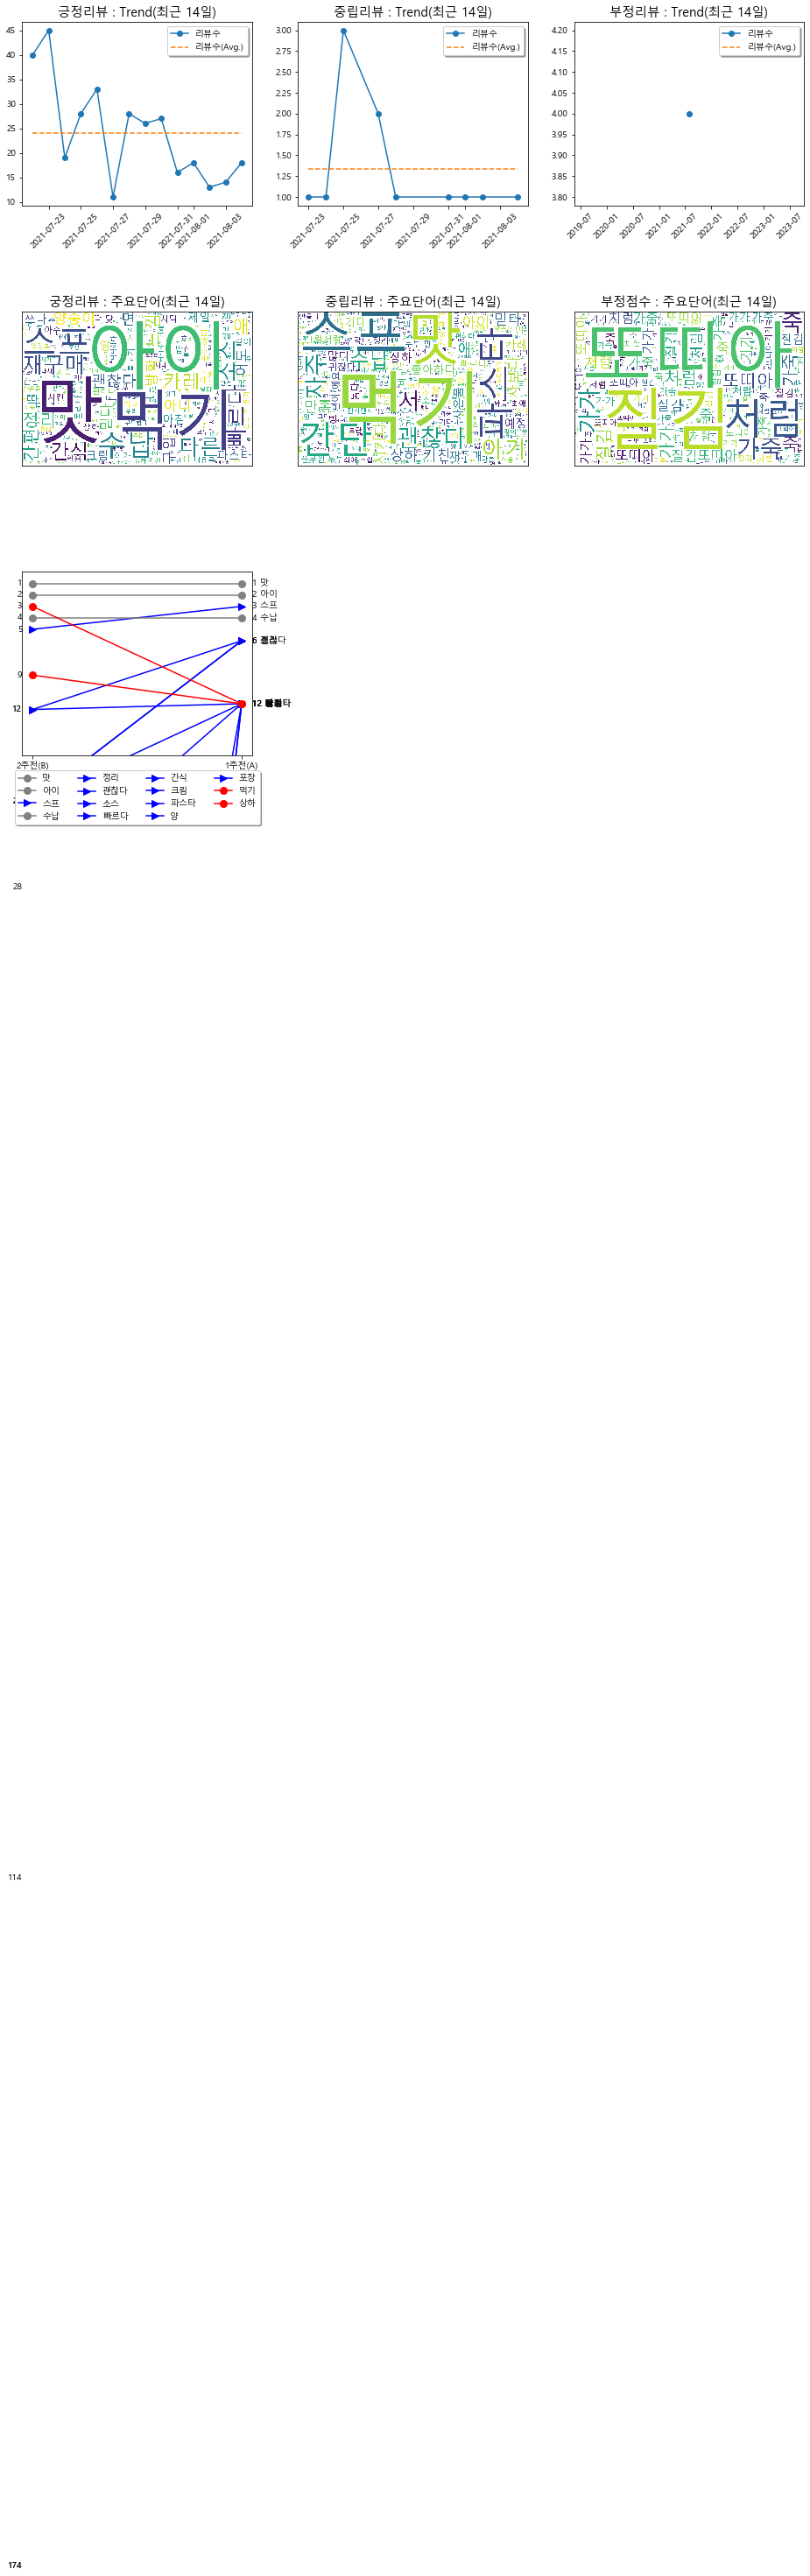

In [687]:
# Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
date2 = datetime.today().strftime('%Y%m%d')
image_name = date2[2:] +'_cs_Trend_graph.png'

plt.figure(figsize=(16, 20))

plt.subplot(4,3,1)
average_line(trend_review_pos)
plt.title('Í∏çÏ†ïÎ¶¨Î∑∞ : Trend(ÏµúÍ∑º 14Ïùº)',fontsize='x-large')   

plt.subplot(4,3,2)
average_line(trend_review_nue)
plt.title('Ï§ëÎ¶ΩÎ¶¨Î∑∞ : Trend(ÏµúÍ∑º 14Ïùº)',fontsize='x-large')   

plt.subplot(4,3,3)
average_line(trend_review_neg)
plt.title('Î∂ÄÏ†ïÎ¶¨Î∑∞ : Trend(ÏµúÍ∑º 14Ïùº)',fontsize='x-large')   


plt.subplot(4,3,4)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.imshow(wordcloud_gen(df_review_all[df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê'] == '5']['token']), cmap=plt.cm.binary)
plt.title('Í∂ÅÏ†ïÎ¶¨Î∑∞ : Ï£ºÏöîÎã®Ïñ¥(ÏµúÍ∑º 14Ïùº)',fontsize='x-large')

plt.subplot(4,3,5)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.imshow(wordcloud_gen(df_review_all[df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê'] == '4']['token']), cmap=plt.cm.binary)
plt.title('Ï§ëÎ¶ΩÎ¶¨Î∑∞ : Ï£ºÏöîÎã®Ïñ¥(ÏµúÍ∑º 14Ïùº)',fontsize='x-large')

plt.subplot(4,3,6)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.imshow(wordcloud_gen(df_review_all[df_review_all['Íµ¨Îß§ÏûêÌèâÏ†ê'] == '1']['token']), cmap=plt.cm.binary)
plt.title('Î∂ÄÏ†ïÏ†êÏàò : Ï£ºÏöîÎã®Ïñ¥(ÏµúÍ∑º 14Ïùº)',fontsize='x-large')

plt.subplot(4,3,7)
REPORT = REPORT_03_pos
dataset = wordrank_pos
word = list(REPORT['ÎÇ¥Ïö©'].head(15))
arrow_lengths = list(REPORT['diff'].head(15))
for i, v in enumerate(word):
    temp = dataset[dataset['ÎÇ¥Ïö©'] == v ]
    if arrow_lengths[i] > 0:
        arrow_color = 'red'
        arrow_marker = 'o'
    elif arrow_lengths[i] < 0:
        arrow_color = 'blue'
        arrow_marker = '>'
    else:
        arrow_color = 'gray'
        arrow_marker = 'o'
    plt.plot(temp.Í∏∞Í∞ÑÍµ¨Î∂Ñ, temp.RANK, color=arrow_color, marker=arrow_marker, markersize=8)
    plt.text(0-0.05, 
             temp.RANK.values[0], 
             '{:,.0f}'.format(temp.RANK.values[0])+' '+ v , va='center' )
    try:
        plt.text(1+0.05, temp.RANK.values[1], '{:,.0f}'.format(temp.RANK.values[1]), va='center', ha='right')
    except:
        pass
yticks = plt.yticks()[0]
plt.ylim(0,16)
plt.yticks([])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
# plt.title('GDP Per Capta\n', loc='left', fontsize=20)
lgd = plt.legend(word, loc='lower center', bbox_to_anchor=(0.5, -0.4), fancybox=True, shadow=True, ncol=4)

plt.show()

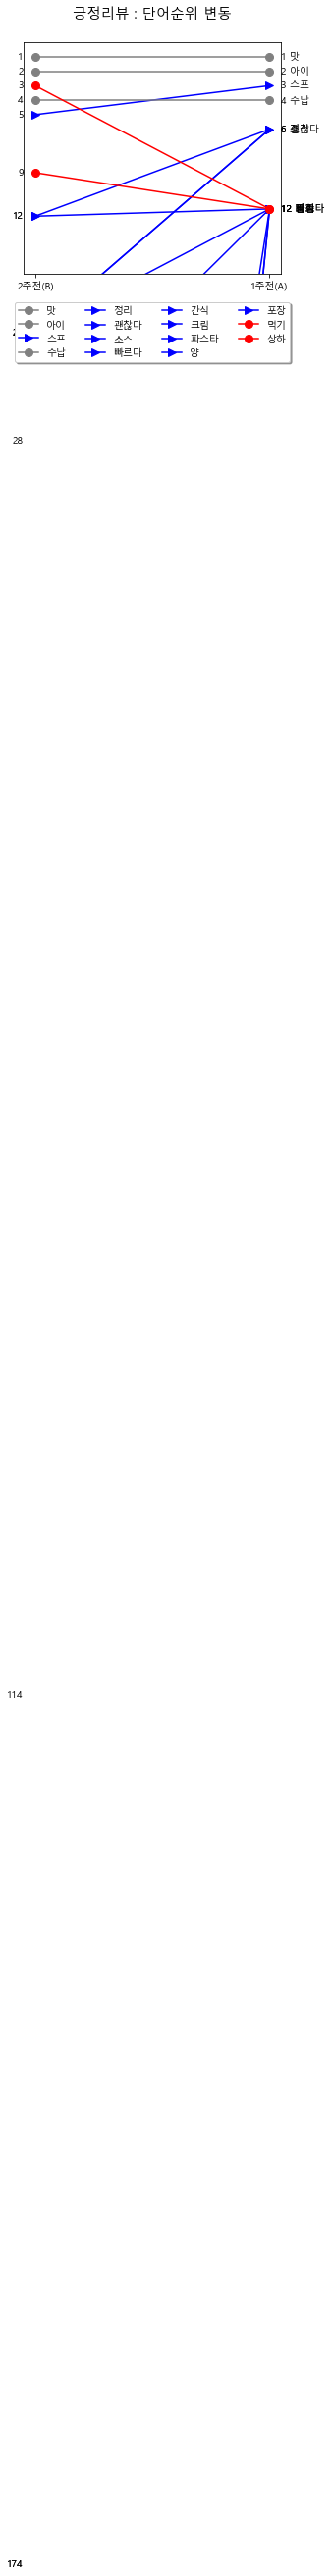

In [703]:
plt.figure(figsize=(16, 20))
plt.subplot(4,3,7)
REPORT = REPORT_03_pos
dataset = wordrank_pos
word = list(REPORT['ÎÇ¥Ïö©'].head(15))
arrow_lengths = list(REPORT['diff'].head(15))
for i, v in enumerate(word):
    temp = dataset[dataset['ÎÇ¥Ïö©'] == v ]
    if arrow_lengths[i] > 0:
        arrow_color = 'red'
        arrow_marker = 'o'
    elif arrow_lengths[i] < 0:
        arrow_color = 'blue'
        arrow_marker = '>'
    else:
        arrow_color = 'gray'
        arrow_marker = 'o'
    plt.plot(temp.Í∏∞Í∞ÑÍµ¨Î∂Ñ, temp.RANK, color=arrow_color, marker=arrow_marker, markersize=8)
    plt.text(0-0.05, 
             temp.RANK.values[0], 
             '{:,.0f}'.format(temp.RANK.values[0])+' '+ v , va='center' )
    try:
        plt.text(1+0.05, temp.RANK.values[1], '{:,.0f}'.format(temp.RANK.values[1]), va='center', ha='right')
    except:
        pass
yticks = plt.yticks()[0]
plt.ylim(0,16)
plt.yticks([])
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.title('Í∏çÏ†ïÎ¶¨Î∑∞ : Îã®Ïñ¥ÏàúÏúÑ Î≥ÄÎèô\n', loc='center', fontsize='x-large')
lgd = plt.legend(word, loc='lower center', bbox_to_anchor=(0.5, -0.4), fancybox=True, shadow=True, ncol=4)

plt.show()

In [559]:
###############
# Î¶¨Ìè¨Ìä∏Ïö© ÏûêÎ£å ÎßåÎì§Í∏∞ : 5.ÌÇ§ÏõåÎìúÎ≥Ñ rawdata
#####

data_by_keyword = pd.DataFrame()

category_count = []
for text1 ,text2 in category :
    df_sort = df_review_all[(df_review_all['token'].str.contains(str(text2)))]
    df_sort = df_sort[(df_sort['category2'].str.contains(str(text1)))][['Î¶¨Î∑∞Îì±Î°ùÏùº','ÏàòÏßëÏ±ÑÎÑê','Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©','Íµ¨Îß§ÏûêÌèâÏ†ê', 'category2']]
    df_sort = df_sort.drop_duplicates()
    if len(df_sort) > 0:
        df_sort['ÌÇ§ÏõåÎìú'] = text2
        category_count.append(len(df_sort))
        data_by_keyword = pd.concat([df_sort, data_by_keyword]) 
    else:
        category_count.append(int(0))
        
report_05 = pd.DataFrame(category)
report_05 = report_05.rename(columns={0: "Category", 1: "ÌÇ§ÏõåÎìú"})
report_05['Î¶¨Î∑∞Í∞úÏàò'] = category_count

In [560]:
report_05

Category  ÌÇ§ÏõåÎìú  Î¶¨Î∑∞Í∞úÏàò
0   ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎπÑÎ¶¨Îã§     3
1   ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à   ÎÉÑÏÉà     1
2   ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎßõÏóÜÎã§    12
3   ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à   Î∞çÎ∞ç    50
4       ÎëêÏú†  ÎπÑÎ¶¨Îã§    19
5       ÎëêÏú†   ÎÉÑÏÉà     2
6       ÎëêÏú†  ÎßõÏóÜÎã§    13
7       ÎëêÏú†   Î∞çÎ∞ç    37
8       ÎëêÏú†   Îã¨Îã§    80

In [561]:
data_by_keyword

Î¶¨Î∑∞Îì±Î°ùÏùº   ÏàòÏßëÏ±ÑÎÑê                                             Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©  \
482  2021-07-22  3 ÎÑ§Ïù¥Î≤Ñ                            ÏûêÏ£º Î®πÎçòÍ±¥Îç∞, Îã®Î∞±Ïßà ÎëêÏú†Î≥¥Îã® Îçî Îã¨ÏïÑÏöî   
485  2021-07-22  3 ÎÑ§Ïù¥Î≤Ñ  Îã§Î•∏ Ï†úÌíàÏùÄ ÎÑàÎ¨¥ Îã¨ÏïÑÏÑú Î∞îÍøîÎ¥§ÎäîÎç∞ ÎßéÏù¥ Îã¨ÏßÄ ÏïäÍ≥† Í±¥Í∞ïÌïòÍ≤å Íæ∏Ï§ÄÌûà Î®πÏùÑ Ïàò ÏûàÏùÑ ...   
512  2021-07-22  3 ÎÑ§Ïù¥Î≤Ñ                         ÎßõÏûàÏñ¥Ïöî~ \nÏôÑÏ†Ñ Îã¨ÏßÑ ÏïäÏúºÎÇò Í≥†ÏÜåÌïú ÎßõÏù¥ üëç   
657  2021-07-22  3 ÎÑ§Ïù¥Î≤Ñ                           ÎßéÏù¥ ÎπÑÎ¶¨ÏßÄ ÏïäÍ≥† Ï†ÅÎãπÌûà Îã¨ÏïÑÏÑú Í¥úÏ∞ÆÏïòÏñ¥Ïöî!   
662  2021-07-22  3 ÎÑ§Ïù¥Î≤Ñ              Ï≤òÏùåÎ®πÏñ¥Î≥¥Îäî Í≥†Îã®Î∞± ÎëêÏú†Ïù∏Îç∞ ÏÉùÍ∞ÅÎ≥¥Îã§ Îä¶Í≤å ÌïòÏßÄ ÏïäÍ≥† Ï†ÅÎãπÌûà Îã¨ÏïÑÏöî   
...         ...    ...                                                ...   
7992 2021-08-04  3 ÎÑ§Ïù¥Î≤Ñ                                 ÎßõÏûàÏñ¥Ïöî ÎàÑÍ∞ÄÎßõÏóÜÎã§ÌñàÎäîÎç∞ ÎëêÏú†ÎßõÏûÑ   
1192 2021-07-23  3 ÎÑ§Ïù¥Î≤Ñ  ÏÇ¨ÏùÄÌíàÍ≥º Í∞ôÏù¥ Î∞∞ÏÜ°ÎêòÏóàÏñ¥Ïöî\nÎìúÎùºÏù¥Î∞±Îßå Íµ¨ÏûÖÌïòÎ†§Ìï¥ÎèÑ Î™áÎßåÏõêÌïòÎäîÎç∞^^\nÌíàÏßàÎèÑ Ï¢ãÍ≥† ...   
578  2021-07-22  3 ÎÑ§Ïù¥Î≤Ñ  ÎëêÏú†ÏóêÏÑú ÎπÑÎ¶∞Îßõ ÎÇòÏÑú Ïã´ÏúºÏã†Î∂ÑÎì§Ïù¥Î©¥ Ï¢ãÏïÑÌï†Í∫ºÍ∞ôÏïÑÏöî „Öé„Öé Î¨µÏßÅÌïú ÎäêÎÇåÏùÄ ÏóÜÍ≥† Í∞ÄÎ≤ºÏö¥Îäê...   
5496 2021-07-30  3 ÎÑ§Ïù¥Î≤Ñ                             ÎπÑÎ¶∞ÎÇ¥ ÏóÜÍ≥† ÍπîÎÅîÌïú ÎßõÏù¥ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî!!   
7906 2021-08-04  3 ÎÑ§Ïù¥Î≤Ñ  ÏßÅÏòÅÏù¥Îùº ÌöåÏ†ÑÏú®Ïù¥ ÎÜíÍ≥† Ìè¨Ïû•ÎèÑ Î∞ïÏä§Ìè¨Ïû• ÌïúÎ≤à Îçî ÎêòÏñ¥ÏôÄÏÑú Ï¢ãÏïÑÏöî. Ïú†ÎãπÎ∂àÎÇ¥Ï¶ùÏù¥Îùº Ïö∞...   

     Íµ¨Îß§ÏûêÌèâÏ†ê category2  ÌÇ§ÏõåÎìú  
482      5        ÎëêÏú†   Îã¨Îã§  
485      5        ÎëêÏú†   Îã¨Îã§  
512      5        ÎëêÏú†   Îã¨Îã§  
657      5        ÎëêÏú†   Îã¨Îã§  
662      5        ÎëêÏú†   Îã¨Îã§  
...    ...       ...  ...  
7992     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎßõÏóÜÎã§  
1192     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à   ÎÉÑÏÉà  
578      5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎπÑÎ¶¨Îã§  
5496     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎπÑÎ¶¨Îã§  
7906     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎπÑÎ¶¨Îã§  

[217 rows x 6 columns]

In [603]:
REPORT_04 = pd.concat([df_review_pos.head(10), df_review_neg.head(10)], ignore_index=True)

In [604]:
REPORT_04

Íµ¨Îß§ÏûêÌèâÏ†ê                                             Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©      Î¶¨Î∑∞Îì±Î°ùÏùº  \
0      5                                  Îã®Î∞±Ïßà ÏñëÏùÄ Ïù¥ Ï†úÌíàÏù¥ ÏµúÍ≥†Ïù∏ÎìØ 2021-07-22   
1      5                                       Í≥†ÏÜåÌïòÏù¥ ÎßõÏûàÍ≥† Ï¢ãÏïÑÏöî 2021-07-22   
2      5                      ÎßõÏùÄ Î¨¥Ï≤®Í∞ÄÎ≥¥Îã§ Î¨µÏßÅÌïú ÎßõÏù¥Íµ¨Ïöî. Îã¨Îã¨ÌïòÎãà ÎßõÏûàÏñ¥Ïöî. 2021-07-22   
3      5                                        Í∞ÑÌé∏Ìïú ÏïÑÏπ®ÎåÄÏö©ÏûÖÎãàÎã§ 2021-07-22   
4      5                              Í∞ÄÏ°± Îã§Í∞ôÏù¥ ÎßàÏãúÍ≥† ÏûàÏñ¥Ïöî Ïû¨Íµ¨Îß§ÌñàÏñ¥Ïöî 2021-07-22   
5      5  Ïú†ÌÜµÍ∏∞ÌïúÎèÑ ÎÑâÎÑâÌïòÎ©¥ÏÑú Îπ®ÎåÄÎèÑ ÏòàÏÅòÍ≤å Í∞ôÏù¥ Ïûò ÏôîÏäµÎãàÎã§. Î¨¥ÏóáÎ≥¥Îã§ ÏÑ±Î∂ÑÏù¥ Í∞ÄÏû• ÎßàÏùåÏóê... 2021-07-22   
6      5                       Îã¨ÏßÄÏïäÍ≥† ÎßõÏûàÏñ¥Ïöî\nÎã¨ÏßÄ ÏïäÏùÄÍ≤å Ï†êÏ†ê ÏùµÏàôÌï¥ ÏßÄÎÇ¥Ïöî 2021-07-22   
7      4               Ï†ÄÎãπÏù¥ÎùºÎèÑ Ï¢ÄÎã¨ÏïÑ Î≥ÑÌïòÎÇòÎ∫êÏñ¥Ïöî\n99.98ÌîÑÎ°úÏßúÎ¶¨Í∞Ä Î∞±Î∞∞ÎçîÎÇòÏïÑÏöî„Öã 2021-07-22   
8      5                                         Ï†úÌíà Î∞∞ÏÜ° ÎßåÏ°±Ìï¥Ïöî 2021-07-22   
9      5                                Î™ªÎßâÏñ¥Î¥§ÏßÄÎßå ÎëêÏú† Ï¢ãÏïÑÌï¥ÏÑú ÏãúÏº∞Ïñ¥Ïöî 2021-07-22   
10     1                               Î∞∞ÏÜ°Ïù¥ ÌïúÎ≤àÏò§Í≥† ÏïàÏò§ÎÑ§Ïöî\nÏó∞ÎùΩÎèÑÏóÜÍ≥† 2021-07-22   
11     1                       ÌèâÏÜå Ï†úÌíàÌÅ¨Í≤å Î¨∏Ï†ú ÏóÜÏù¥ ÏôîÎäîÎç∞ Ïù¥Î≤àÏóêÎäî ÌÑ∞Ï†∏ÏôîÎÑ§Ïöî 2021-07-23   
12     1  Î∞∞ÏÜ° ÏßÑÏßú ÏµúÏïÖÏù¥ÎÑ§Ïöî\nÎã§ Ïó¥Î†§ÏÑú ÏôîÏñ¥Ïöî\nÌÑ∞ÏßÑÍ±¥ ÏóÜÏßÄÎßå Ï∞åÍ∑∏Îü¨Ï†∏ÏûàÍµ¨Ïöî\nÏùåÏãùÏù∏Îç∞ ... 2021-07-24   
13     2   Ï†ÄÎãπÏù¥Ïñ¥ÏÑú ÏãúÏº∞ÎäîÎç∞ Ï†ú ÏûÖÎßõÏóêÎäî Î≥ÑÎ£®ÎÑ§ÏòÅ.... Îã§ÏùåÏóêÎäî Îã§Î•∏ Îßõ ÏãúÌÇ§Î†§Íµ¨Ïö© ....„Öé 2021-07-25   
14     2  Î≠ê Îäò ÎØøÍ≥† Î®πÎäî ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶àÏù∏Îç∞Ïöî. Ïó¥ Í∞ú Ï§ëÏóê ÏÑ∏ Í∞úÍ∞Ä ÌÑ∞Ï†∏ÏÑú ÏôîÏäµÎãàÎã§\nÏ†ÄÎ†áÍ≤å... 2021-07-28   
15     1                                        Î∞∞ÏÜ°Ïù¥ ÎÑàÎ¨¥ ÎäêÎ†∏Ïñ¥Ïöî 2021-07-28   
16     1  Ïù¥Îü∞Ï†Å Ï≤òÏùåÏûÖÎãàÎã§. Î∞∞ÏÜ° Î∞õÏïÑ 4ÌÜµ ÎßàÏãúÍ≥† ÏÉàÎ°úÏö¥ Í±∞ Í∫ºÎÇ¥Î†§Í≥† Î≥¥Îãà ÎπµÎπµÌïòÍ≤å Î∂ÄÌíÄÏñ¥... 2021-07-29   
17     2                       ÎßπÌÉïÏù¥ÏòàÏöî Í≤ÄÏùÄÏΩ©Ïùò ÏßÑÌïúÍ≥†ÏÜåÌï®ÏùÑ Í∏∞ÎåÄ ÌñàÎäîÎç∞ÏïÑÎãàÎÑ§Ïöî 2021-07-30   
18     2                                        ÎÑàÎ¨¥ Î¨º Í∞ôÏïÑÏöî ÏΩ©Î¨º 2021-07-30   
19     2     ÎåÄÏùëÏùÄ Ï¢ãÏïòÏßÄÎßå Ïï†Ï¥àÎ∂ÄÌÑ∞ ÌÑ∞Ï†∏Ïò§ÎäîÍ≤å Î¨∏Ï†úÍ∞Ä ÌÅ¨Îã§Í≥† ÏÉùÍ∞ÅÌï©ÎãàÎã§. Ìè¨Ïû•Î∞©Ïãù Î≥ÄÍ≤ΩÌïòÏÑ∏Ïöî. 2021-07-31   

       ÏàòÏßëÏ±ÑÎÑê category2                                              token  \
0     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                               Îã®Î∞±Ïßà ÏñëÏùÄ Ïù¥ Ï†úÌíà Ïù¥ ÏµúÍ≥† Ïù∏ ÎìØ   
1     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                                       Í≥†ÏÜå ÌïòÏù¥ ÎßõÏûàÎã§ Ï¢ãÎã§   
2     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†             Îßõ ÏùÄ Î¨¥ Ï≤®Í∞Ä Î≥¥Îã§ Î¨µÏßÅÌïòÎã§ Îßõ Ïù¥Íµ¨ Ïöî  Îã¨Îã¨ ÌïòÎãà ÎßõÏûàÎã§ Ïñ¥Ïöî    
3     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                                      Í∞ÑÌé∏ Ìïú ÏïÑÏπ® ÎåÄÏö© Ïù¥Îã§   
4     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                         Í∞ÄÏ°± Îã§ Í∞ôÏù¥ ÎßêÎã§ ÏûàÎã§ Ïñ¥Ïöî Ïû¨Íµ¨Îß§ ÌïòÎã§ Ïñ¥Ïöî   
5     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†  Ïú†ÌÜµÍ∏∞Ìïú ÎèÑ ÎÑâÎÑâÌïòÎã§ Î©¥ÏÑú Îπ®ÎåÄ ÎèÑ ÏòàÏÅòÎã§ Í∞ôÏù¥ ÏûêÎã§ Ïò§Îã§  Î¨¥Ïóá Î≥¥Îã§ ÏÑ±Î∂Ñ Ïù¥ Í∞Ä...   
6     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                   Îã¨ ÏßÄ ÏïäÎã§ ÎßõÏûàÎã§ Ïñ¥Ïöî Îã¨ ÏßÄ ÏïäÎã§ Ï†êÏ†ê ÏùµÏàô Ìï¥ ÏßÄÎÇ¥Îã§   
7     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†        Ï†ÄÎãπ Ïù¥ÎùºÎèÑ Ï¢ÄÎã¨ ÏïÑ Î≥ÑÌïòÎÇò ÎπºÎã§ Ïñ¥Ïöî  ÌîÑÎ°ú ÏßúÎã§ Î¶¨Í∞Ä Î∞±Î∞∞ Îçî ÎÇòÏïÑ Ïöî „Öã   
8     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                                       Ï†úÌíà Î∞∞ÏÜ° ÎßåÏ°± Ìï¥ Ïöî   
9     3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                       Î™ª ÎßâÎã§ Î≥¥Îã§ ÏßÄÎßå ÎëêÏú† Ï¢ãÎã§ ÏïÑÌï¥ ÏÑú ÏãúÌÇ§Îã§ Ïñ¥Ïöî   
10    3 ÎÑ§Ïù¥Î≤Ñ        ÎëêÏú†                              Î∞∞ÏÜ° Ïù¥ ÌïúÎ≤à Ïò§Îã§ ÏïåÎã§ Ïó∞ÎùΩ ÎèÑ ÏóÜÎã§   
11  4 SSGÎã∑Ïª¥        ÎëêÏú†                     ÌèâÏÜå Ï†úÌíà ÌÅ¨Í≤å Î¨∏Ï†ú ÏóÜÏù¥ Ïò§Îã§ Ïù¥Î≤à ÏóêÎäî ÌÑ∞ÏßÄÎã§ Ïò§Îã§   
12    3 ÎÑ§Ïù¥Î≤Ñ    ÏïÑÎ™¨Î

In [ ]:
# Î∂ÄÏ†ï Î¶¨Î∑∞





In [562]:
##########
# Excel ÌååÏùº ÏÉùÏÑ±(using XlsxWriter)
###

date2 = datetime.today().strftime('%Y%m%d')
date2 = date2[2:]
excel_name = date2 + '_report.xlsx'
writer = pd.ExcelWriter(excel_name, engine='xlsxwriter')

# 1.ÌÇ§ÏõåÎìúÎ≥Ñ Î¶¨Î∑∞ÎÇ¥Ïö©
data_by_keyword.to_excel(writer, sheet_name='1.ÌÇ§ÏõåÎìúÍ∏∞Ï§Ä Î¶¨Î∑∞')

# 2.Î∂ÄÏ†ïÎ¶¨Î∑∞
df_review_neg.to_excel(writer, sheet_name='2.Î∂ÄÏ†ïÎ¶¨Î∑∞)')

writer.save()

In [654]:
writer.close()

### #.Î¶¨Î∑∞ÎÇ¥Ïö©Ïóê ÎåÄÌïú T/F Î™®Îç∏ Ï†ÅÏö©(1~5 ÏòàÏ∏°)

In [151]:
data_by_keyword2 = data_by_keyword.reset_index()

In [152]:
len(data_by_keyword2)

218

In [145]:
# Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞/ÌôúÏö©
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

def sentiment_predict(new_sentence, max_len = 80):
    new_sentence = twitter.morphs(new_sentence, stem=True) # ÌÜ†ÌÅ∞Ìôî
    new_sentence = [word for word in new_sentence if not word in stopword] # Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    with open('./model/210729_tokenizer(GRU).pickle', 'rb') as handle:
        tokenizer = pickle.load(handle) # ÏÇ¨Ï†Ñ Î∂àÎü¨Ïò§Í∏∞
    encoded = tokenizer.texts_to_sequences([new_sentence]) # Ï†ïÏàò Ïù∏ÏΩîÎî©
    pad_new = pad_sequences(encoded, maxlen = max_len) # Ìå®Îî©
    loaded_model = tf.keras.models.load_model('./model/210729_NPL_best_model(GRU)_v2.h5')
    score = float(loaded_model.predict(pad_new)) # ÏòàÏ∏°
    score = round(score/2 * 10,2)
#     print("Î¶¨Î∑∞Ï†êÏàò {:.2f}".format(score))
    return score

In [157]:
%%time
score_modeling = []
for i in range(len(data_by_keyword2)):
    try:
        score_temp = sentiment_predict(data_by_keyword['Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö©'][i])
        score_modeling.append(score_temp)
    except:
        score_modeling.append('0')

Wall time: 5min 18s


In [154]:
data_by_keyword2['score_Ï°∞Ï†ï'] = score_modeling

In [155]:
data_by_keyword2

level_0  index      Î¶¨Î∑∞Îì±Î°ùÏùº   ÏàòÏßëÏ±ÑÎÑê  \
0          0    160 2021-07-15  3 ÎÑ§Ïù¥Î≤Ñ   
1          1    162 2021-07-15  3 ÎÑ§Ïù¥Î≤Ñ   
2          2    165 2021-07-15  3 ÎÑ§Ïù¥Î≤Ñ   
3          3    178 2021-07-15  3 ÎÑ§Ïù¥Î≤Ñ   
4          4    194 2021-07-15  3 ÎÑ§Ïù¥Î≤Ñ   
..       ...    ...        ...    ...   
213      213   8067 2021-07-28  3 ÎÑ§Ïù¥Î≤Ñ   
214      214   8528 2021-07-28  3 ÎÑ§Ïù¥Î≤Ñ   
215      215   3680 2021-07-21  3 ÎÑ§Ïù¥Î≤Ñ   
216      216   5401 2021-07-23  3 ÎÑ§Ïù¥Î≤Ñ   
217      217   4662 2021-07-22  3 ÎÑ§Ïù¥Î≤Ñ   

                                                Î¶¨Î∑∞ÏÉÅÏÑ∏ÎÇ¥Ïö© Íµ¨Îß§ÏûêÌèâÏ†ê category2  ÌÇ§ÏõåÎìú  \
0                        Îã¨ÏßÄÏïäÏùÄ ÎëêÏú†Î®πÎã§Í∞Ä Ï£ºÎ¨∏ÌñàÎäîÎç∞ ÏÉùÍ∞ÅÎ≥¥Îã§ ÎßéÏù¥ Îã¨ÏïÑÏöî.     4        ÎëêÏú†   Îã¨Îã§   
1                      Ïú†ÌÜµÍ∏∞ÌïúÎèÑ Ï†ÅÎãπÌïòÍ≥† ÎßõÎèÑ Ï¢ãÎÑ§Ïöî\nÏµ∏ÏΩîÏö∞Ïú†Î≥¥Îã§ Îçú Îã¨ÏïÑÏöî     4        ÎëêÏú†   Îã¨Îã§   
2     Ïù¥Í±∞ Î®πÏúºÎãà Îã§Î•∏Í±¥ Î™ª Î®πÍ≤†Ïñ¥Ïöî„Öã„Öã„Öã ÎÑàÎ¨¥ ÎßõÏûàÏñ¥Ïöî\nÏ¥àÏΩîÏö∞Ïú†Ïóê ÎπÑÌï¥ Îçú Îã¨ÏïÑÏÑú Ï¢ãÏïÑÏöî     5        ÎëêÏú†   Îã¨Îã§   
3    Ìè¨Ïû•ÏùÄ Ïù¥ ÏÉÅÌÉúÏóêÏÑú Îî± ÎßûÎäî Î∞ïÏä§Ïóê Îã¥Í≤® ÏòµÎãàÎã§. Ìï≠ÏÉÅ Î®πÎäî Ï†úÌíàÏù¥Îùº Ïûò Î®πÍ≥† ÏûàÏäµ...     5        ÎëêÏú†   Îã¨Îã§   
4                                  ÏÑ±Î∂Ñ Ï¢ãÍ≥† Ïïà Îã¨ÏïÑÏÑú Î®πÍ∏∞ Ï¢ãÏïÑÏöî!     4        ÎëêÏú†   Îã¨Îã§   
..                                                 ...   ...       ...  ...   
213             Ï≤òÏùåÏóê Î®πÏùÑÎïåÎäî Îã®ÎßõÏóê Í∏∏Îì§Ïó¨Ï†∏ÏûàÏñ¥ÏÑú ÎßõÏóÜÏóàÎäîÎç∞ ÏßÄÍ∏àÏùÄ Î®πÏùÑÎßåÌïòÎÑ§Ïöî„Öã     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎßõÏóÜÎã§   
214  Ïó≠Ïãú ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à~~~ÎßõÏóÜÎäîÎùºÏù∏Ïù¥ÏóÜÏñ¥Ïöî~^^\nÏù¥Î≤àÏóê ÏãùÏù¥ÏÑ¨Ïú† ÎÇòÏôîÍ∏∏Îûò Í∞ÄÍ≤©ÎèÑÏ∞©ÌïòÍ≥†...     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎßõÏóÜÎã§   
215  Ï≤òÏùåÏóêÎäî ÎÉÑÏÉàÍ∞Ä ÏùµÏàôÌïòÏßÄ ÏïäÏïòÎäîÎç∞ Î®πÏùÑÏàòÎ°ù Í∞ÄÎ≥çÍ≥† ÎßõÏûàÏñ¥Ïöî. ÎÉâÏû•Í≥†Ïóê Îñ®Ïñ¥ÏßÄÏßÄ ÏïäÍ≤å...     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à   ÎÉÑÏÉà   
216  ÏÇ¨ÏùÄÌíàÍ≥º Í∞ôÏù¥ Î∞∞ÏÜ°ÎêòÏóàÏñ¥Ïöî\nÎìúÎùºÏù¥Î∞±Îßå Íµ¨ÏûÖÌïòÎ†§Ìï¥ÎèÑ Î™áÎßåÏõêÌïòÎäîÎç∞^^\nÌíàÏßàÎèÑ Ï¢ãÍ≥† ...     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à   ÎÉÑÏÉà   
217  ÎëêÏú†ÏóêÏÑú ÎπÑÎ¶∞Îßõ ÎÇòÏÑú Ïã´ÏúºÏã†Î∂ÑÎì§Ïù¥Î©¥ Ï¢ãÏïÑÌï†Í∫ºÍ∞ôÏïÑÏöî „Öé„Öé Î¨µÏßÅÌïú ÎäêÎÇåÏùÄ ÏóÜÍ≥† Í∞ÄÎ≤ºÏö¥Îäê...     5    ÏïÑÎ™¨ÎìúÎ∏åÎ¶¨Ï¶à  ÎπÑÎ¶¨Îã§   

     score_Ï°∞Ï†ï  
0           2  
1           5  
2           2  
3           5  
4           1  
..        ...  
213         1  
214         0  
215         4  
216         0  
217         5  

[218 rows x 9 columns]

In [156]:
# Excel Ï†ÄÏû•
date2 = datetime.today().strftime('%Y%m%d')
excel_name = date2[2:] +'_' +category_group +'_report.xlsx'
data_by_keyword2.to_excel(excel_name, sheet_name= 'Sheet1' )